In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('NaN_Housing_Prices.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,7,1180.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,7,2170.0,400.0,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,NaN,6,770.0,NaN,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,7,1050.0,910.0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,8,1680.0,NaN,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data.head().shape

(5, 31)

In [4]:
data.isnull().sum()

Sale_Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
No of Times Visited                          19485
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                      13123
Age of House (in Years)                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (in Sqft)           0
Lot Area after Renovation (in Sqft)              0
Years Since Renovation                       20695
Condition_of_the_House_Excellent                 0
Condition_of_the_House_Fair                      0
Condition_of_the_House_Good                      0
Condition_of_the_House_Okay    

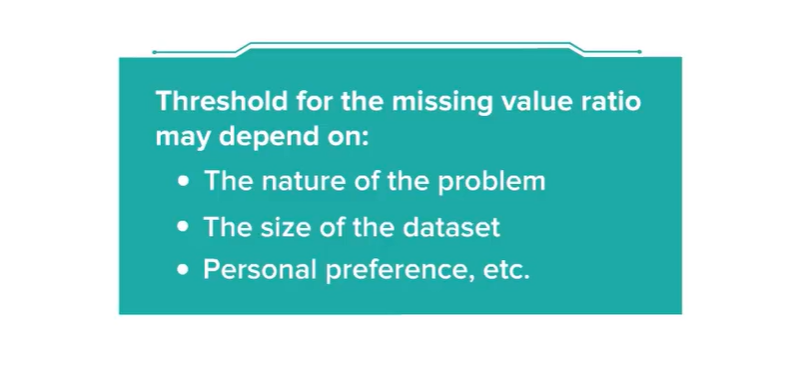

In [5]:
# for i in data.columns:
#     tmp = data[i].insnull().sum()/len(data)
#     if tmp > 0.7:
#         print(i,' Removed having missing value ratio ',tmp)
#         data.drop(columns=[i])

for i in data.columns:
    tmp = data[i].isnull().sum() / len(data)
    if tmp > 0.7:
        print(i, 'Removed having missing value ratio', tmp)
        data.drop(columns=[i])


No of Times Visited Removed having missing value ratio 0.9017076218242399
Years Since Renovation Removed having missing value ratio 0.9577028090147623


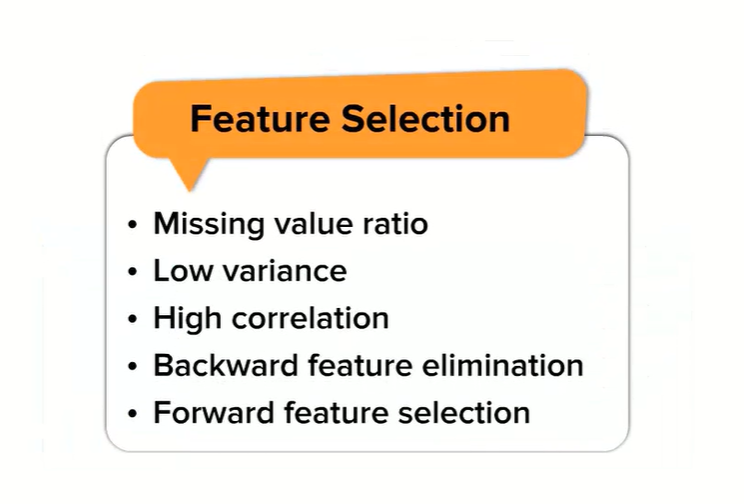

In [6]:
data = pd.read_csv('Raw_Housing_Prices3.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [7]:
categorical_list = ['ID','Date House was Sold','Sale Price', 'Waterfront View', 'No of Times Visited','Condition of the House','Overall Grade','Zipcode']
numerical_data = data.drop(columns=categorical_list)

In [8]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21609 non-null  int64  
 1   No of Bathrooms                            21609 non-null  float64
 2   Flat Area (in Sqft)                        21609 non-null  float64
 3   Lot Area (in Sqft)                         21609 non-null  float64
 4   No of Floors                               21609 non-null  float64
 5   Area of the House from Basement (in Sqft)  21609 non-null  float64
 6   Basement Area (in Sqft)                    21609 non-null  int64  
 7   Age of House (in Years)                    21609 non-null  int64  
 8   Renovated Year                             21609 non-null  int64  
 9   Latitude                                   21609 non-null  float64
 10  Longitude             

In [9]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

norm_data = norm.fit_transform(numerical_data)

norm_data = pd.DataFrame(norm_data,columns= numerical_data.columns)
norm_data

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.000363,0.000121,0.142628,0.682924,0.000121,0.142628,0.000000,0.007615,0.000000,0.005743,-0.014777,0.161968,0.682924
1,0.000264,0.000198,0.226174,0.637335,0.000176,0.190972,0.035202,0.005896,0.175219,0.004200,-0.010765,0.148729,0.672273
2,0.000152,0.000076,0.058440,0.758961,0.000076,0.058440,0.000000,0.006451,0.000000,0.003623,-0.009277,0.206437,0.611874
3,0.000527,0.000395,0.258159,0.658569,0.000132,0.138299,0.119859,0.006981,0.000000,0.006259,-0.016121,0.179131,0.658569
4,0.000263,0.000175,0.147072,0.707346,0.000088,0.147072,0.000000,0.002714,0.000000,0.004169,-0.010684,0.157577,0.656834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,0.000922,0.000768,0.470018,0.347445,0.000922,0.470018,0.000000,0.002765,0.000000,0.014653,-0.037585,0.470018,0.463567
21605,0.000401,0.000250,0.231383,0.582263,0.000200,0.231383,0.000000,0.000401,0.000000,0.004759,-0.012256,0.183303,0.721193
21606,0.000667,0.000250,0.340207,0.450274,0.000667,0.340207,0.000000,0.003002,0.000000,0.015874,-0.040791,0.340207,0.669407
21607,0.000788,0.000657,0.420407,0.627457,0.000526,0.420407,0.000000,0.003679,0.000000,0.012490,-0.032074,0.370484,0.338165


In [10]:
tmp = norm_data.var()
tmp

No of Bedrooms                               4.071117e-08
No of Bathrooms                              2.802492e-08
Flat Area (in Sqft)                          1.231500e-02
Lot Area (in Sqft)                           1.351803e-02
No of Floors                                 3.008524e-08
Area of the House from Basement (in Sqft)    1.010140e-02
Basement Area (in Sqft)                      1.648493e-03
Age of House (in Years)                      2.002344e-05
Renovated Year                               1.684740e-03
Latitude                                     1.077875e-05
Longitude                                    7.109191e-05
Living Area after Renovation (in Sqft)       1.079222e-02
Lot Area after Renovation (in Sqft)          1.250016e-02
dtype: float64

In [11]:
T = 1e-4

for i in tmp:
    if i < T:
        norm_data.drop(columns=[tmp[tmp == i].index[0]],inplace=True)
norm_data.var()

Flat Area (in Sqft)                          0.012315
Lot Area (in Sqft)                           0.013518
Area of the House from Basement (in Sqft)    0.010101
Basement Area (in Sqft)                      0.001648
Renovated Year                               0.001685
Living Area after Renovation (in Sqft)       0.010792
Lot Area after Renovation (in Sqft)          0.012500
dtype: float64

In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

data = pd.read_csv('Transformed_Housing_Data2.csv')
data = data.drop_duplicates()

## Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X

## Checking and removing Multicollinearity

X.corr()

k = X.corr()
z = [frozenset([str(i), str(j)]) for i in k.columns for j in k.columns if (k.loc[i, j] > abs(0.5)) and (i != j)]
z_set = set(z)
z_set, len(z_set)



# Calculating VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF

def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)
    if vif.max() >5 :
        print(vif[vif==vif.max()].index[0],' has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

for i in range(7):
    vif_data = MC_remover(vif_data)
vif_data

pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)

## Train and Test set

X = vif_data
Y = data['Sale_Price']
vif_data

# Linear Regression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

lr.coef_

predictions = lr.predict(x_test)
lr.score(x_test,y_test)

data = pd.read_csv('Transformed_Housing_Data2.csv')
data = data.drop_duplicates()

## Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X

## Checking and removing Multicollinearity

X.corr()

k = X.corr()
z = [frozenset([str(i), str(j)]) for i in k.columns for j in k.columns if (k.loc[i, j] > abs(0.5)) and (i != j)]
z_set = set(z)
z_set, len(z_set)



# Calculating VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF

def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)
    if vif.max() >5 :
        print(vif[vif==vif.max()].index[0],' has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

for i in range(7):
    vif_data = MC_remover(vif_data)
vif_data

pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)

## Train and Test set

X = vif_data
Y = data['Sale_Price']
vif_data

# Linear Regression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

lr.coef_

predictions = lr.predict(x_test)
lr.score(x_test,y_test)

Flat Area (in Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
Flat Area (in Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


0.8452890273566878

In [21]:
def adj_r2(data_x,data_y,predictions):
    from sklearn.metrics import r2_score
    r = r2_score(data_y,predictions)
    n = len(data_y)
    m = len(data_x.columns)
    adj_r = 1 - ((1-r)*(n-1)/(n-m-1))
    return adj_r

In [22]:
adj_r2(x_test,y_test,predictions)

0.8446175179420214

In [23]:
def return_r2(x,y,model):
    model.fit(x,y)
    pred = model.predict(x)
    m = len(x.columns)
    r2 = adj_r2(x,y,pred)
    return r2

In [53]:
# def forward_selection(model, x, y, max_features):
#     f_col = []
#     history = []
    
#     for i in range(max_features):
        
#         f_col.append(' = blank')
#         print(f_col,' = f_col')
#         tmp = f_col[:]
#         Rmax = -1
        
#         for var in x.columns:
#             tmp[-1] = var
#             print(tmp,' = tmp')
#             r2 = return_r2(x[tmp],y,model)
#             if r2 > Rmax:
#                 Rmax = r2
#                 f_col[-1] = var
#                 elim = var
#                 print(elim,' = elim')
                
#             print('selected', f_col[-1],"with new r2 = ",Rmax)
#             history.append(Rmax)
#             print(history, ' = history')
        
#         return Rmax, history, x[f_col]


# def forward_selection(model, x, y, max_features):
#     f_col = []
#     history = []

#     for i in range(max_features):
#         f_col.append(' = blank')
#         #print(f_col, ' = f_col')
#         tmp = f_col[:]
#         Rmax = -1

#         for var in x.columns:
#             tmp[-1] = var
#             #print(tmp, ' = tmp')
#             r2 = return_r2(x[var], y, model)  # Calculate the R-squared using a defined function
#             if r2 > Rmax:
#                 Rmax = r2
#                 f_col[-1] = var
#                 elim = var
#                 #print('elim', ' selected with new r2 =', elim)
                
#             history.append(Rmax)
#             #print(history, ' = history')
        
        
#         #print(x.columns)
#         print('Selected:', f_col[-1], 'with highest R2 =', Rmax)
#         x = x.drop(columns=var)
#         print(' ')

#     selected_features = x[f_col]  # Subset of the input features based on the selected columns
#     return Rmax, history, selected_features


def forward_selection(model, x, y, max_features):
    f_col = []
    history = []

    for i in range(max_features):
        f_col.append(' = blank')
        tmp = f_col[:]
        Rmax = -1

        for var in x.columns:
            tmp[-1] = var
            if var in x.columns:
                r2 = return_r2(x[tmp], y, model)
                if r2 > Rmax:
                    Rmax = r2
                    f_col[-1] = var

            history.append(Rmax)

        print('Selected:', f_col[-1], 'with highest R2 =', Rmax)
        print(' ')

    selected_features = x[f_col]  # Subset of the input features based on the selected columns
    return Rmax, history, selected_features




# def forward_selection(model, x, y, max_features):
#     f_col = []
#     history = []

#     for i in range(max_features):
#         f_col.append(' = blank')
#         tmp = f_col[:]
#         Rmax = -1

        for var in x.columns:
            tmp[-1] = var
            if var in x.columns:
                r2 = return_r2(x[tmp], y, model)
                if r2 > Rmax:
                    Rmax = r2
                    f_col[-1] = var

#         x = x.drop(columns=f_col[-1])  # Drop the selected column from x
#         history.append(Rmax)

#         print('Selected:', f_col[-1], 'with highest R2 =', Rmax)
#         print(' ')

#     selected_features = x[f_col]  # Subset of the input features based on the selected columns
#     return Rmax, history, selected_features



# def forward_selection(model, x, y, max_features):
#     f_col = []
#     history = []

#     for i in range(max_features):
#         f_col.append(' = blank')
#         tmp = f_col[:]
#         Rmax = -1

#         for var in x.columns:
#             tmp[-1] = var
#             r2 = return_r2(x[tmp], y, model)
#             if r2 > Rmax:
#                 Rmax = r2
#                 f_col[-1] = var
#                 elim = var

#             history.append(Rmax)
#             x = x.drop(columns=elim)  # Move this line here to drop the column within the inner loop

#         print('Selected:', f_col[-1], 'with highest R2 =', Rmax)
#         print(' ')

#     selected_features = x[f_col]  # Subset of the input features based on the selected columns
#     return Rmax, history, selected_features

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

score, history, sel_data = forward_selection(lr, x_train, y_train,14)

Selected: Overall Grade with highest R2 = 0.45896825689269316
 
Selected: Latitude with highest R2 = 0.5702636580929539
 
Selected: Living Area after Renovation (in Sqft) with highest R2 = 0.6265969898433309
 
Selected: Age of House (in Years) with highest R2 = 0.6701407515241591
 
Selected: No of Bathrooms with highest R2 = 0.6997421556452799
 
Selected: Zipcode_Group_Zipcode_Group_8 with highest R2 = 0.7254452696689928
 
Selected: No of Times Visited with highest R2 = 0.7422925188252281
 
Selected: Zipcode_Group_Zipcode_Group_6 with highest R2 = 0.7546258099609879
 
Selected: Area of the House from Basement (in Sqft) with highest R2 = 0.7682429817639682
 
Selected: Zipcode_Group_Zipcode_Group_4 with highest R2 = 0.7774480807481381
 
Selected: Zipcode_Group_Zipcode_Group_7 with highest R2 = 0.7883039582753906
 
Selected: Zipcode_Group_Zipcode_Group_5 with highest R2 = 0.7973363989435106
 
Selected: Zipcode_Group_Zipcode_Group_3 with highest R2 = 0.811071326222508
 
Selected: Basement 

In [ ]:
data.info()

# Backward Elimination

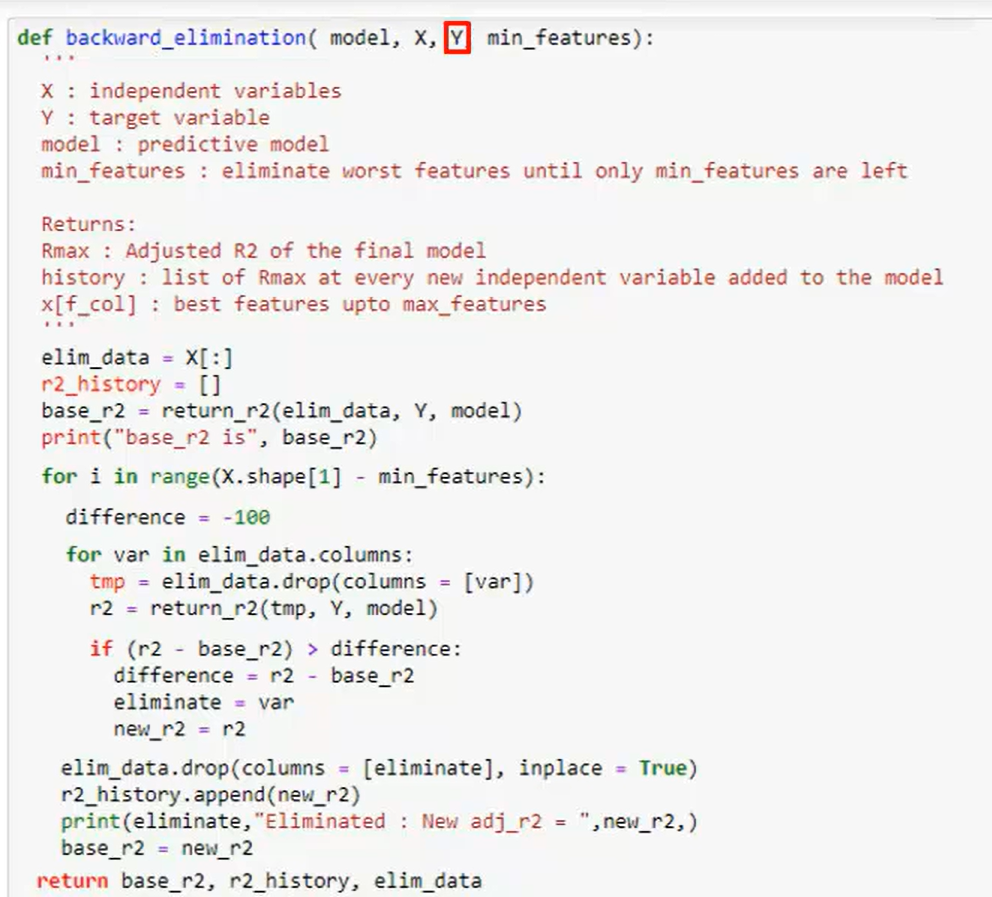

In [ ]:
def backward_elimination(model, x, y, min_features):
    elim_data = x[:]
    r2_history = []
    base_r2 = return_r2(elim_data,y,model)
    print('base_r2 is ', base_r2)
    
    for i in range(x.shape[1]-min_features):
        difference = -100
        
        for var in elim_data.columns:
            tmp = elim_data.drop(columns=[var])
            r2 = return_r2(tmp,y,model)
            
            if(r2 - base_r2) > difference:
                difference = r2 - base_r2
                eliminate = var
                new_r2 = r2
                
        elim_data.drop(columns = [eliminate] , inplace = True)
        r2_history.append(new_r2)
        print(eliminate,'Eliminated : New adj_r2 = ', new_r2,)
        base_r2 = new_r2
    return base_r2, r2_history, elim_data

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

score, history, eli_data = backward_elimination(lr, x_train, y_train,11)

In [ ]:
eli_data

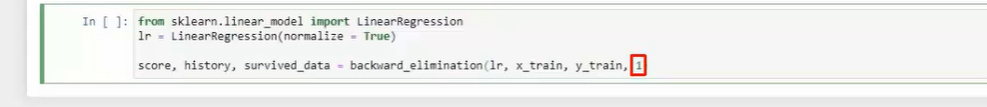

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

score, history, surived_data = backward_elimination(lr, x_train, y_train,1)

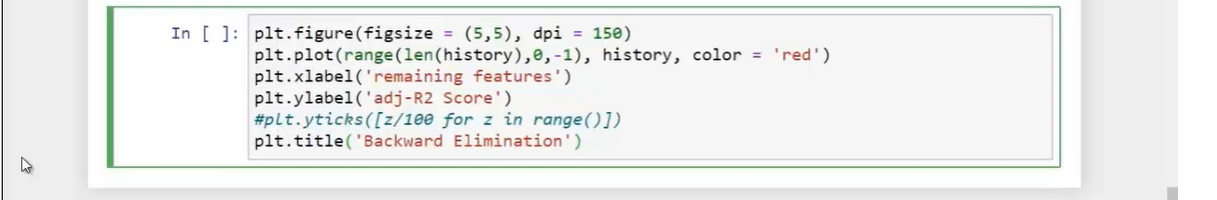

In [ ]:
plt.figure(figsize=(5,5), dpi=150)
plt.plot(range(len(history),0,-1),history,color='red')
plt.show()